# Import Library

In [38]:
# import package
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score  
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Dataset

In [39]:
data = pd.read_csv('../Dataset/Amazon Sales 20-21.csv')

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_5852\4075417838.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Dataset/Amazon Sales 20-21.csv')


In [40]:
data.head()

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,category,payment_method,bi_st,cust_id,year,month,ref_num,Name Prefix,First Name,Middle Initial,Last Name,Gender,age,full_name,E Mail,Sign in date,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,01/10/2020,received,574772,oasis_Oasis-064-36,21,89.9,1798.0,0.0,1798.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,01/10/2020,received,574774,Fantastic_FT-48,11,19.0,190.0,0.0,190.0,Men's Fashion,cod,Valid,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,01/10/2020,complete,574777,mdeal_DMC-610-8,9,149.9,1199.2,0.0,1199.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,01/10/2020,complete,574779,oasis_Oasis-061-36,9,79.9,639.2,0.0,639.2,Men's Fashion,cod,Net,60124,2020,Oct-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,13/11/2020,received,595185,MEFNAR59C38B6CA08CD,2,99.9,99.9,0.0,99.9,Men's Fashion,cod,Valid,60124,2020,Nov-20,987867,Drs.,Jani,W,Titus,F,43,"Titus, Jani",jani.titus@gmail.com,8/22/2006,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  int64  
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  int64  
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  int64  
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [42]:
# Convert order_date column to datetime type
data['order_date'] = pd.to_datetime(data['order_date'], format='%d/%m/%Y')

In [43]:
data.describe()

,order_date,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,2021-03-12 11:18:32.008715264,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
min,2020-10-01 00:00:00,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,2020-12-24 00:00:00,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,2021-03-16 00:00:00,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,2021-05-18 00:00:00,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,2021-09-30 00:00:00,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000
std,NaN,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100


# Feature List

## RFM (Recency, Frequency, Monetary)
RFM is a commonly used approach to customer segmentation:
- Recency: Time since the customer's last transaction (order_date).
    * Example: Recency = max(order_date) - last_order_date.
- Frequency: The number of transactions per customer.
    * Example: Frequency = count(order_id) per cust_id.
- Monetary: Total shopping value of the customer.
    * Example: Monetary = sum(total) per cust_id.

In [44]:
# Specify the date of analysis (e.g., the last date in the data)
analysis_date = data['order_date'].max()

# Calculating Recency
recency = data.groupby('cust_id').agg(last_order_date=('order_date', 'max'))
recency['recency_days'] = (analysis_date - recency['last_order_date']).dt.days
recency = recency[['recency_days']].reset_index()

# Calculating Frequency
frequency = data.groupby('cust_id').agg(frequency=('order_id', 'count')).reset_index()

# Calculating Monetary
monetary = data.groupby('cust_id').agg(monetary=('total', 'sum')).reset_index()

# Combine feature
rfm_feature = recency.merge(frequency, on='cust_id').merge(monetary, on='cust_id')

# Show
rfm_feature.head()



,cust_id,recency_days,frequency,monetary
0,4,1,41,27394.190
1,15,231,6,216.800
2,16,322,20,11868.899
3,20,1,11,28719.018
4,21,239,1,105.000


In [45]:
rfm_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_id       64248 non-null  int64  
 1   recency_days  64248 non-null  int64  
 2   frequency     64248 non-null  int64  
 3   monetary      64248 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.0 MB


## Discount Features
Features related to discount usage can provide insight into whether customers tend to take advantage of discounts:

- Average_Discount_Percent: The average discount percentage.
    - Example: mean(Discount_Percent) per cust_id.
- Total_Discount_Used: Total value of discount used.
    - Example: sum(discount_amount) per cust_id.

In [46]:
# Calculating the average discount applied
average_discount = data.groupby('cust_id').agg(average_discount_percent=('Discount_Percent', 'mean')).reset_index()

# Calculating the total discount used
total_discount = data.groupby('cust_id').agg(total_discount_used=('discount_amount', 'sum')).reset_index()

# Combine data
discount_feature = average_discount.merge(total_discount, on='cust_id')

discount_feature.head()

,cust_id,average_discount_percent,total_discount_used
0,4,4.225538,3406.010
1,15,0.000000,0.000
2,16,8.528056,1121.001
3,20,5.475500,2875.682
4,21,0.000000,0.000


In [47]:
discount_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cust_id                   64248 non-null  int64  
 1   average_discount_percent  64248 non-null  float64
 2   total_discount_used       64248 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.5 MB


## Purchase Behavior Features
- Average_Order_Value: Average value per transaction.
    - Example: Average_Order_Value = sum(total) / count(order_id) per cust_id.
- Average_Qty_Ordered: The average number of items ordered per transaction.
    - Example: mean(qty_ordered) per cust_id.
- Diversity_of_Categories: The number of product categories purchased.
    - Example: nunique(category) per cust_id.
- Preferred_Payment_Method: The most frequently used payment method.
    - Example: mode(payment_method) per cust_id.

In [48]:
# Calculating the average value per transaction
average_order_value = data.groupby('cust_id').agg(average_order_value=('total', 'mean')).reset_index()

# Calculating the average number of items ordered per transaction
average_qty_ordered = data.groupby('cust_id').agg(average_qty_ordered=('qty_ordered', 'mean')).reset_index()

# Count the number of unique categories per customer
diversity_of_categories = data.groupby('cust_id').agg(diversity_of_categories=('category', 'nunique')).reset_index()


# Calculate the most frequently used payment method
preferred_payment_method = (
    data.groupby(['cust_id', 'payment_method'])
    .size()
    .reset_index(name='method_count')
)

# Take the payment method with the highest frequency
preferred_payment_method = preferred_payment_method.loc[
    preferred_payment_method.groupby('cust_id')['method_count'].idxmax()
]

# Select the relevant column
preferred_payment_method = preferred_payment_method[['cust_id', 'payment_method']].rename(columns={'payment_method': 'preferred_payment_method'})

# Combine features
purchase_feature = preferred_payment_method.merge(average_order_value, on='cust_id').merge(average_qty_ordered, on='cust_id').merge(diversity_of_categories, on='cust_id')

purchase_feature.head()

,cust_id,preferred_payment_method,average_order_value,average_qty_ordered,diversity_of_categories
0,4,cod,668.150976,2.000000,5
1,15,cod,36.133333,2.166667,3
2,16,cod,593.444950,1.900000,3
3,20,cod,2610.819818,2.000000,3
4,21,cod,105.000000,6.000000,1


In [49]:
purchase_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cust_id                   64248 non-null  int64  
 1   preferred_payment_method  64248 non-null  object 
 2   average_order_value       64248 non-null  float64
 3   average_qty_ordered       64248 non-null  float64
 4   diversity_of_categories   64248 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.5+ MB


## Geographic Features
This feature is important for understanding the geographical distribution of customers:

- Region_Purchase_Concentration: The proportion of purchases from each region.
    - Example: count(order_id) per region.
- State_Purchase_Concentration: The proportion of purchases from each state.
    - Example: count(order_id) per state.

In [50]:
# Calculate the purchase amount per region per customer
region_purchase = data.groupby(['cust_id', 'Region']).size().reset_index(name='region_count')

# Calculate the total purchase for each customer
total_purchase_per_customer = data.groupby('cust_id').size().reset_index(name='total_count')

# Combine to calculate the proportion of purchases per region
region_purchase = region_purchase.merge(total_purchase_per_customer, on='cust_id')
region_purchase['region_purchase_concentration'] = region_purchase['region_count'] / region_purchase['total_count']

# Select the region with the highest proportion of purchases
region_purchase_concentration = region_purchase.loc[
    region_purchase.groupby('cust_id')['region_purchase_concentration'].idxmax()
][['cust_id', 'Region', 'region_purchase_concentration']]

region_feature = region_purchase_concentration.rename(columns={'Region': 'top_region'})

region_feature.head()



,cust_id,top_region,region_purchase_concentration
0,4,Midwest,1.0
1,15,Midwest,1.0
2,16,South,1.0
3,20,South,1.0
4,21,South,1.0


## Demographic Features
This feature is useful for understanding customer characteristics:

- Age_Group: Age categorization.
    - Example: young (18-25), adult (26-45), senior (46+).
- Gender_Distribution: The proportion of purchases by gender.
    - Example: count(order_id) per gender.

In [51]:
# Age group
def categorize_age(age):
    if age < 25:
        return 'young'
    elif 25 <= age <= 45:
        return 'adult'
    else:
        return 'senior'

data['age_group'] = data['age'].apply(categorize_age)
age_group = data[['cust_id', 'age_group']].drop_duplicates()

demographics_feature = age_group

demographics_feature.head()


,cust_id,age_group
0,60124,adult
7,42485,adult
28,53620,senior
33,56836,adult
44,60125,senior


In [52]:
demographics_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64248 entries, 0 to 286391
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cust_id    64248 non-null  int64 
 1   age_group  64248 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


## Temporal Features
Features related to purchase time patterns:

- Day_of_Week: The day of the week when the purchase was made.
    - Example: extract(day_of_week from order_date).
- Purchase_Seasonality: Purchase trends by month or season.
    - Example: count(order_id) by month.

In [53]:
# Identify the days of the week when customers transact most frequently
data['day_of_week'] = data['order_date'].dt.day_name()
preferred_day = data.groupby(['cust_id', 'day_of_week']).size().reset_index(name='day_count')
preferred_day = preferred_day.loc[preferred_day.groupby('cust_id')['day_count'].idxmax()]
preferred_day_feature = preferred_day[['cust_id', 'day_of_week']].rename(columns={'day_of_week': 'preferred_day_of_week'})

preferred_day_feature.head()



,cust_id,preferred_day_of_week
3,4,Sunday
8,15,Thursday
9,16,Thursday
12,20,Thursday
14,21,Wednesday


In [54]:

preferred_day_feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64248 entries, 3 to 96085
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cust_id                64248 non-null  int64 
 1   preferred_day_of_week  64248 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


## Profitability Features
Features that indicate profit contribution:

- Customer_Lifetime_Value (CLV): Estimated total value generated by the customer during the relationship with the business.
    - Example: sum(total) - sum(discount_amount) per cust_id.
- Gross_Margin_Percentage: Estimated profit margin based on order value.
    - Example: (sum(total) - sum(cost_of_goods_sold)) / sum(total).

In [55]:
# Calculate CLV per customer
clv = data.groupby('cust_id').agg(
    total_spent=('total', 'sum'),       
    total_discount=('discount_amount', 'sum')  
)

# Calculate CLV
clv['customer_lifetime_value'] = clv['total_spent'] - clv['total_discount']

# Select only relevant columns
clv_feature = clv[['customer_lifetime_value']].reset_index()

clv_feature.head()



,cust_id,customer_lifetime_value
0,4,23988.180
1,15,216.800
2,16,10747.898
3,20,25843.336
4,21,105.000


## Product Interaction Feature
This feature identifies product buying patterns:

- Top_Selling_Category: The most frequently purchased product category.
    - Example: mode(category) per cust_id.
- Product_Diversity_Index: SKU diversity index.
    - Example: nunique(sku) / count(item_id) per cust_id.

In [56]:
# Identifying favorite product categories
top_category = data.groupby(['cust_id', 'category']).size().reset_index(name='category_count')
top_category = top_category.loc[top_category.groupby('cust_id')['category_count'].idxmax()]
top_category = top_category[['cust_id', 'category']].rename(columns={'category': 'top_selling_category'})

# Calculate Product Diversity Index per customer
product_diversity = data.groupby('cust_id').agg(
    unique_skus=('sku', 'nunique'),  
    total_items=('item_id', 'count')  
)

# Calculate Product Diversity Index
product_diversity['product_diversity_index'] = product_diversity['unique_skus'] / product_diversity['total_items']

# Combine feature
product_diversity = product_diversity[['product_diversity_index']].reset_index()

product_feature = top_category.merge(product_diversity, on='cust_id')

product_feature.head()


,cust_id,top_selling_category,product_diversity_index
0,4,Men's Fashion,0.756098
1,15,Men's Fashion,1.000000
2,16,Women's Fashion,0.950000
3,20,Appliances,0.454545
4,21,Beauty & Grooming,1.000000


In [57]:
product_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cust_id                  64248 non-null  int64  
 1   top_selling_category     64248 non-null  object 
 2   product_diversity_index  64248 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ MB


## Loyalty and Engagement Features
- Customer_Loyalty_Index: An indicator of customer loyalty based on transaction frequency and value.
    - Example: (Frequency * Monetary).
- Days_Since_Sign_In: The time since the customer first signed up.
    - Example: current_date - sign_in_date.

In [58]:
# Calculate Frequency and Monetary per customer
loyalty = data.groupby('cust_id').agg(
    frequency=('order_id', 'count'),  
    monetary=('total', 'sum')         
)

# Calculate Customer Loyalty Index
loyalty['customer_loyalty_index'] = loyalty['frequency'] * loyalty['monetary']

# Merge results to main dataset
loyalty = loyalty[['customer_loyalty_index']].reset_index()

# Convert 'sign_in_date' to datetime format
data['sign_in_date'] = pd.to_datetime(data['Sign in date'])

# Get current dates
current_date = data['order_date'].max()

# calculate Days Since Sign In
data['days_since_sign_in'] = (current_date - data['sign_in_date']).dt.days

# Calculate the average days_since_sign_in per customer
days_since_sign_in = data.groupby('cust_id')['days_since_sign_in'].max().reset_index()

# Combine feature
loyalty_feature = loyalty.merge(days_since_sign_in, on='cust_id')

loyalty_feature.head()


,cust_id,customer_loyalty_index,days_since_sign_in
0,4,1123161.790,4287
1,15,1300.800,3926
2,16,237377.980,9491
3,20,315909.198,4703
4,21,105.000,4145


In [59]:
loyalty_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_id                 64248 non-null  int64  
 1   customer_loyalty_index  64248 non-null  float64
 2   days_since_sign_in      64248 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.5 MB


# Combine feature
Combining and finding the best combination of features for clustering

In [60]:
combine_feature = rfm_feature.merge(
    discount_feature,
    on='cust_id',
    how='left'  
).merge(
    purchase_feature,
    on='cust_id',
    how='left'
).merge(
    region_feature,
    on='cust_id',
    how='left'
).merge(
    demographics_feature,
    on='cust_id',
    how='left'
).merge(
    preferred_day_feature,
    on='cust_id',
    how='left'
).merge(
    clv_feature,
    on='cust_id',
    how='left'
).merge(
    product_feature,
    on='cust_id',
    how='left'
).merge(
    loyalty_feature,
    on='cust_id',
    how='left'
)


combine_feature.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,preferred_payment_method,average_order_value,average_qty_ordered,diversity_of_categories,top_region,region_purchase_concentration,age_group,preferred_day_of_week,customer_lifetime_value,top_selling_category,product_diversity_index,customer_loyalty_index,days_since_sign_in
0,4,1,41,27394.190,4.225538,3406.010,cod,668.150976,2.000000,5,Midwest,1.0,adult,Sunday,23988.180,Men's Fashion,0.756098,1123161.790,4287
1,15,231,6,216.800,0.000000,0.000,cod,36.133333,2.166667,3,Midwest,1.0,senior,Thursday,216.800,Men's Fashion,1.000000,1300.800,3926
2,16,322,20,11868.899,8.528056,1121.001,cod,593.444950,1.900000,3,South,1.0,senior,Thursday,10747.898,Women's Fashion,0.950000,237377.980,9491
3,20,1,11,28719.018,5.475500,2875.682,cod,2610.819818,2.000000,3,South,1.0,adult,Thursday,25843.336,Appliances,0.454545,315909.198,4703
4,21,239,1,105.000,0.000000,0.000,cod,105.000000,6.000000,1,South,1.0,adult,Wednesday,105.000,Beauty & Grooming,1.000000,105.000,4145


In [61]:
combine_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        64248 non-null  int64  
 1   recency_days                   64248 non-null  int64  
 2   frequency                      64248 non-null  int64  
 3   monetary                       64248 non-null  float64
 4   average_discount_percent       64248 non-null  float64
 5   total_discount_used            64248 non-null  float64
 6   preferred_payment_method       64248 non-null  object 
 7   average_order_value            64248 non-null  float64
 8   average_qty_ordered            64248 non-null  float64
 9   diversity_of_categories        64248 non-null  int64  
 10  top_region                     64248 non-null  object 
 11  region_purchase_concentration  64248 non-null  float64
 12  age_group                      64248 non-null 

In [62]:
# col=['preferred_payment_method', 'top_region', 'age_group', 'preferred_day_of_week', 'top_selling_category']
#Drop categorical column
col=[   
    'preferred_payment_method',
    'top_region',
    'age_group',
    'preferred_day_of_week',
    'top_selling_category'
    ]
combine_feature = combine_feature.drop(columns=col)


# # One-Hot Encoding combine_feature
# combine_feature = pd.get_dummies(
#     combine_feature, 
#     columns=[
#         'preferred_payment_method',
#         #  'top_region',
#         #  'age_group',
#         #  'preferred_day_of_week',
#          'top_selling_category'
#          ], 
#     drop_first=True
# )


combine_feature.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in
0,4,1,41,27394.190,4.225538,3406.010,668.150976,2.000000,5,1.0,23988.180,0.756098,1123161.790,4287
1,15,231,6,216.800,0.000000,0.000,36.133333,2.166667,3,1.0,216.800,1.000000,1300.800,3926
2,16,322,20,11868.899,8.528056,1121.001,593.444950,1.900000,3,1.0,10747.898,0.950000,237377.980,9491
3,20,1,11,28719.018,5.475500,2875.682,2610.819818,2.000000,3,1.0,25843.336,0.454545,315909.198,4703
4,21,239,1,105.000,0.000000,0.000,105.000000,6.000000,1,1.0,105.000,1.000000,105.000,4145


In [63]:
combine_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64248 entries, 0 to 64247
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        64248 non-null  int64  
 1   recency_days                   64248 non-null  int64  
 2   frequency                      64248 non-null  int64  
 3   monetary                       64248 non-null  float64
 4   average_discount_percent       64248 non-null  float64
 5   total_discount_used            64248 non-null  float64
 6   average_order_value            64248 non-null  float64
 7   average_qty_ordered            64248 non-null  float64
 8   diversity_of_categories        64248 non-null  int64  
 9   region_purchase_concentration  64248 non-null  float64
 10  customer_lifetime_value        64248 non-null  float64
 11  product_diversity_index        64248 non-null  float64
 12  customer_loyalty_index         64248 non-null 

In [64]:
features = combine_feature.copy()
scaler = StandardScaler()  
scaled_features_non_remove = scaler.fit_transform(features)  

# Remove Outlier

In [65]:
features = combine_feature.copy()
scaler = StandardScaler()  
scaled_features = scaler.fit_transform(features)  

# Train Isolation Forest  
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)  
model.fit(scaled_features)  

# Predict outliers and calculate anomaly scores  
predictions = model.predict(scaled_features)  
anomaly_scores = model.decision_function(scaled_features)  

# Add results to dataset  
features['Outlier_Label'] = predictions  
features['Anomaly_Score'] = anomaly_scores  

# Analyze results  
outliers = features[features['Outlier_Label'] == -1]  # Display only outliers  
outliers.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in,Outlier_Label,Anomaly_Score
0,4,1,41,27394.190,4.225538,3406.010,668.150976,2.000000,5,1.0,23988.180,0.756098,1.123162e+06,4287,-1,-0.148352
2,16,322,20,11868.899,8.528056,1121.001,593.444950,1.900000,3,1.0,10747.898,0.950000,2.373780e+05,9491,-1,-0.068991
3,20,1,11,28719.018,5.475500,2875.682,2610.819818,2.000000,3,1.0,25843.336,0.454545,3.159092e+05,4703,-1,-0.111526
7,32,12,230,114272.940,7.453925,16876.060,496.838870,2.117391,12,1.0,97396.880,0.630435,2.628278e+07,6416,-1,-0.262852
8,33,40,132,61874.575,4.609187,3233.625,468.746780,2.196970,13,1.0,58640.950,0.750000,8.167444e+06,7587,-1,-0.213112


In [66]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6425 entries, 0 to 64242
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        6425 non-null   int64  
 1   recency_days                   6425 non-null   int64  
 2   frequency                      6425 non-null   int64  
 3   monetary                       6425 non-null   float64
 4   average_discount_percent       6425 non-null   float64
 5   total_discount_used            6425 non-null   float64
 6   average_order_value            6425 non-null   float64
 7   average_qty_ordered            6425 non-null   float64
 8   diversity_of_categories        6425 non-null   int64  
 9   region_purchase_concentration  6425 non-null   float64
 10  customer_lifetime_value        6425 non-null   float64
 11  product_diversity_index        6425 non-null   float64
 12  customer_loyalty_index         6425 non-null   float

In [67]:
# Filter the dataset to only include inliers  
data_without_outliers = features[features['Outlier_Label'] == 1]  

# Reset index, if needed  
data_without_outliers = data_without_outliers.reset_index(drop=True)  

In [68]:
data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57823 entries, 0 to 57822
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        57823 non-null  int64  
 1   recency_days                   57823 non-null  int64  
 2   frequency                      57823 non-null  int64  
 3   monetary                       57823 non-null  float64
 4   average_discount_percent       57823 non-null  float64
 5   total_discount_used            57823 non-null  float64
 6   average_order_value            57823 non-null  float64
 7   average_qty_ordered            57823 non-null  float64
 8   diversity_of_categories        57823 non-null  int64  
 9   region_purchase_concentration  57823 non-null  float64
 10  customer_lifetime_value        57823 non-null  float64
 11  product_diversity_index        57823 non-null  float64
 12  customer_loyalty_index         57823 non-null 

In [69]:
data_without_outliers.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in,Outlier_Label,Anomaly_Score
0,15,231,6,216.80,0.000000,0.0,36.133333,2.166667,3,1.0,216.80,1.0,1300.80,3926,1,0.083325
1,21,239,1,105.00,0.000000,0.0,105.000000,6.000000,1,1.0,105.00,1.0,105.00,4145,1,0.083540
2,23,54,6,871.14,0.000000,0.0,145.190000,2.333333,2,1.0,871.14,1.0,5226.84,3223,1,0.083242
3,28,132,11,3971.30,6.266262,500.0,361.027273,2.363636,3,1.0,3471.30,1.0,43684.30,5314,1,0.033801
4,41,316,1,219.90,0.000000,0.0,219.900000,2.000000,1,1.0,219.90,1.0,219.90,3541,1,0.108311


# PCA

In [70]:
# Data initialization
pca_data = data_without_outliers.drop(columns=['cust_id','Outlier_Label','Anomaly_Score'])

# Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the main components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# Merge with the original DataFrame (for example, using cust_id as index)
pca_df['cust_id'] = data_without_outliers['cust_id'].values
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cust_id
0,-0.631691,2.267164,0.427278,-0.192355,-0.822459,1.390126,-0.477368,-0.517696,15
1,-1.356324,-0.478187,0.165444,0.977669,0.577381,0.815284,0.412153,0.426269,21
2,-0.313948,1.615638,1.387057,0.402756,-0.388225,-0.439002,-0.958727,0.102704,23
3,3.629050,3.225646,0.944863,-0.448549,-0.344861,0.895134,-1.071707,1.493063,28
4,-1.303961,-0.565172,-0.526204,0.049382,-0.745022,0.727108,0.775625,0.331091,41


# Modelling

In [71]:
# Features for trial without PCA

X = data_without_outliers.drop(columns=['cust_id','Outlier_Label','Anomaly_Score'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Convert data
scaled_features_df = pd.DataFrame(scaled_features, columns=X.columns)

scaled_features_df.head()

,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in
0,0.375642,1.137569,-0.500948,-0.521802,-0.341403,-0.509579,-0.120540,2.450535,0.0,-0.493242,0.573392,-0.316276,-0.361197
1,0.466675,-0.615567,-0.551881,-0.521802,-0.341403,-0.445111,1.372066,-0.427941,0.0,-0.548507,0.573392,-0.411105,-0.290416
2,-1.638483,1.137569,-0.202848,-0.521802,-0.341403,-0.407488,-0.055644,1.011297,0.0,-0.169784,0.573392,-0.004936,-0.588409
3,-0.750903,2.890704,1.209500,0.473747,1.335503,-0.205437,-0.043845,2.450535,0.0,1.115545,0.573392,3.044795,0.087408
4,1.342877,-0.615567,-0.499535,-0.521802,-0.341403,-0.337550,-0.185436,-0.427941,0.0,-0.491709,0.573392,-0.401993,-0.485631


In [72]:
features_reduce = pca_df.drop(columns=['cust_id'])

In [73]:
features_reduce.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.631691,2.267164,0.427278,-0.192355,-0.822459,1.390126,-0.477368,-0.517696
1,-1.356324,-0.478187,0.165444,0.977669,0.577381,0.815284,0.412153,0.426269
2,-0.313948,1.615638,1.387057,0.402756,-0.388225,-0.439002,-0.958727,0.102704
3,3.629050,3.225646,0.944863,-0.448549,-0.344861,0.895134,-1.071707,1.493063
4,-1.303961,-0.565172,-0.526204,0.049382,-0.745022,0.727108,0.775625,0.331091


# kmeans

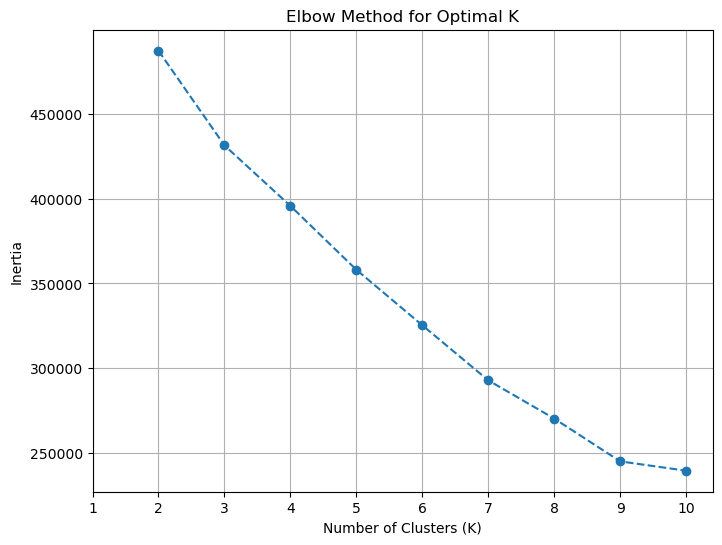

In [74]:
# Calculating inertia for different number of clusters
inertia = []
for k in range(2, 11):  # Evaluate the number of clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_reduce)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

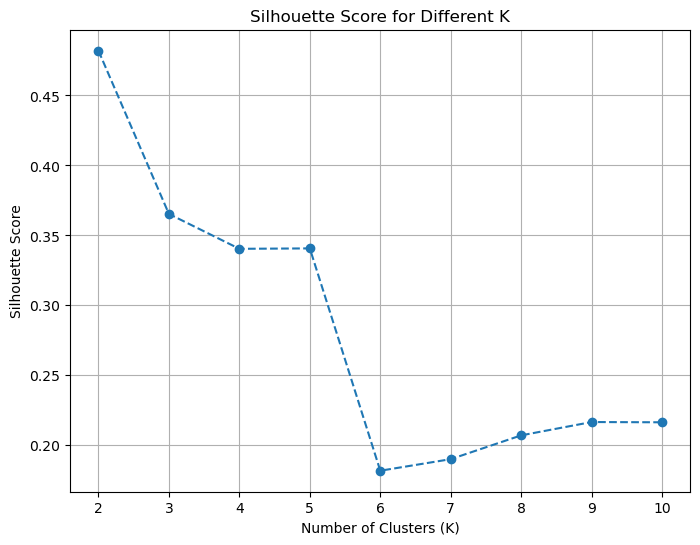

In [75]:
sil_scores = []

for k in range(2, 11):  # Evaluate the number of clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_reduce)

    # Calculate Silhouette Score
    score = silhouette_score(features_reduce, kmeans.labels_)
    sil_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [76]:
# Specify the desired number of clusters (e.g. 4 clusters)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans_df = data_without_outliers.copy()

# Perform cluster fitting and add the cluster results to the DataFrame
kmeans_df['cluster'] = kmeans.fit_predict(features_reduce)

# Display some clustering results
kmeans_df[['cluster']].head()

,cluster
0,0
1,1
2,0
3,0
4,1


In [77]:
# Calculating the amount of data per cluster
cluster_counts = kmeans_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Display the amount of data per cluster
print("Amount of Data per Cluster:")
print(cluster_counts)

Amount of Data per Cluster:
   cluster  count
0        1  41721
1        2   6558
2        0   5346
3        3   4198


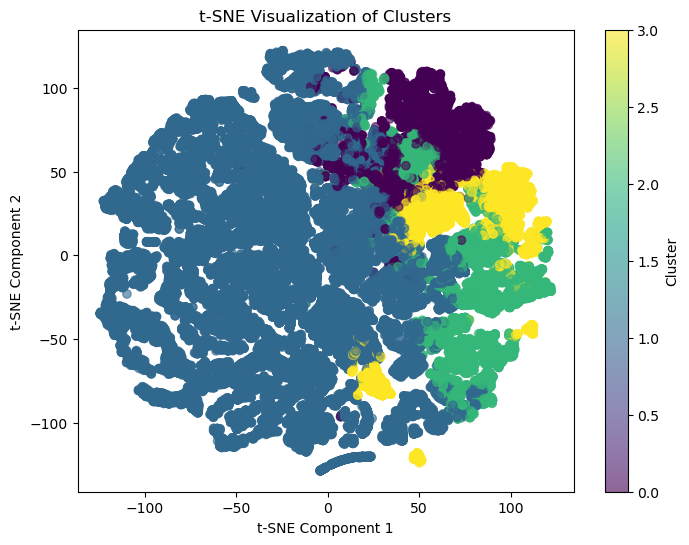

In [78]:
from sklearn.manifold import TSNE

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features_reduce)

labels = kmeans.fit_predict(features_reduce)

# Visualization of t-SNE results with colors based on cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Save output
clusters_dataframes = {}  

# Save DataFrame for each cluster  
for cluster_num in range(n_clusters): 
    clusters_dataframes[cluster_num] = kmeans_df[kmeans_df['cluster'] == cluster_num]  

for cluster_num, cluster_df in clusters_dataframes.items():  
    # Set the filename of each cluster  
    cluster_df.to_excel(f'Output/kmeans/Cluster_{cluster_num}.xlsx', index=False)

In [80]:
# Evaluating clustering  
# 1. Silhouette Score  
silhouette_avg = silhouette_score(features_reduce, kmeans_df['cluster'])  
print(f'Silhouette Score: {silhouette_avg:.2f}')  

# 2. Davies-Bouldin Index  
db_index = davies_bouldin_score(features_reduce, kmeans_df['cluster'])  
print(f'Davies-Bouldin Index: {db_index:.2f}')  

# 3. Calinski-Harabasz Score  
ch_score = calinski_harabasz_score(features_reduce, kmeans_df['cluster'])
print(f'Calinski-Harabasz Score: {ch_score:.2f}')      

Silhouette Score: 0.34
Davies-Bouldin Index: 1.40
Calinski-Harabasz Score: 12887.26


In [81]:
# Evaluating clustering  
# 1. Silhouette Score  
silhouette_avg = silhouette_score(scaled_features, kmeans_df['cluster'])  
print(f'Silhouette Score: {silhouette_avg:.2f}')  

# 2. Davies-Bouldin Index  
db_index = davies_bouldin_score(scaled_features, kmeans_df['cluster'])  
print(f'Davies-Bouldin Index: {db_index:.2f}')  

# 3. Calinski-Harabasz Score  
ch_score = calinski_harabasz_score(scaled_features, kmeans_df['cluster'])
print(f'Calinski-Harabasz Score: {ch_score:.2f}')   

Silhouette Score: 0.34
Davies-Bouldin Index: 1.47
Calinski-Harabasz Score: 11969.79


In [82]:
kmeans_df.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in,Outlier_Label,Anomaly_Score,cluster
0,15,231,6,216.80,0.000000,0.0,36.133333,2.166667,3,1.0,216.80,1.0,1300.80,3926,1,0.083325,0
1,21,239,1,105.00,0.000000,0.0,105.000000,6.000000,1,1.0,105.00,1.0,105.00,4145,1,0.083540,1
2,23,54,6,871.14,0.000000,0.0,145.190000,2.333333,2,1.0,871.14,1.0,5226.84,3223,1,0.083242,0
3,28,132,11,3971.30,6.266262,500.0,361.027273,2.363636,3,1.0,3471.30,1.0,43684.30,5314,1,0.033801,0
4,41,316,1,219.90,0.000000,0.0,219.900000,2.000000,1,1.0,219.90,1.0,219.90,3541,1,0.108311,1


In [143]:
kmeans_df = kmeans_df.drop(columns=['Outlier_Label','Anomaly_Score'])
kmeans_df.to_excel('Output/kmeans/Amazon_Customer_Clustered.xlsx', index=False)

In [ ]:
# kmeans_df.to_csv('Output/kmeans/Amazon_customer.csv', index=False)

# DBSCAN

In [ ]:
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=1.6, min_samples=7)  
labels = dbscan.fit_predict(features_reduce)

# Evaluasi hasil
if len(set(labels)) > 1 and -1 in labels:  
    score = silhouette_score(features_reduce, labels)
    print(f"Silhouette Score: {score}")
else:
    print("Invalid clustering (only noise or 1 cluster).")


Silhouette Score: 0.43489272356259673


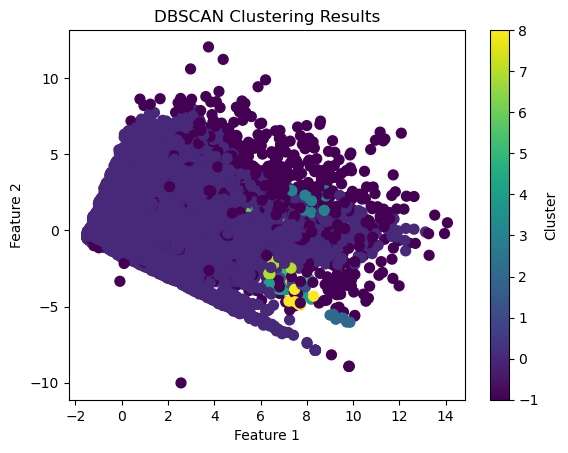

In [84]:
# Ensure features_reduce is a NumPy array
features_reduce = features_reduce.to_numpy() if isinstance(features_reduce, pd.DataFrame) else features_reduce

plt.scatter(features_reduce[:, 0], features_reduce[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

In [85]:
#  Display additional information (optional)
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Amount of noise (-1): {list(labels).count(-1)}")

Number of clusters found: 9
Amount of noise (-1): 825


In [86]:
dbscan_df = data_without_outliers.copy()

# Perform cluster fitting and add the cluster results to the DataFrame
dbscan_df['cluster'] = dbscan.fit_predict(features_reduce)

# Display some clustering results
dbscan_df[['cluster']].head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [87]:
# Calculating the amount of data per cluster
cluster_counts = dbscan_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Display the amount of data per cluster
print("Number of Data per Cluster:")
print(cluster_counts)

Number of Data per Cluster:
   cluster  count
0        0  56910
1       -1    825
2        4     23
3        1     16
4        3     11
5        7      9
6        2      8
7        6      8
8        8      7
9        5      6


In [ ]:
# Save output
clusters_dataframes = {}  

# Save DataFrame for each cluster  
for cluster_num in range(n_clusters):   
    clusters_dataframes[cluster_num] = dbscan_df[dbscan_df['cluster'] == cluster_num]  

for cluster_num, cluster_df in clusters_dataframes.items():  
    # Set the filename of each cluster  
    cluster_df.to_excel(f'Output/DBSCAN/Cluster_{cluster_num}.xlsx', index=False)

# OPTICS

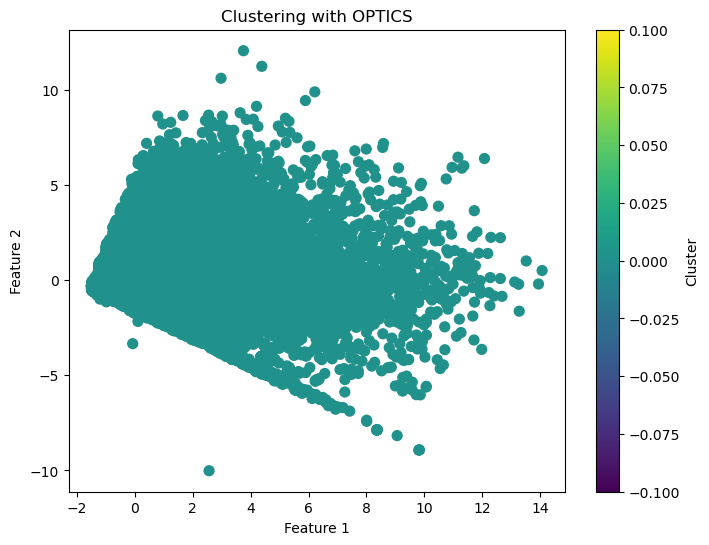

Number of clusters found: 1
Amount of noise (-1): 0


In [89]:
from sklearn.cluster import OPTICS

# Apply OPTICS to the scaled dataset (scaled_features)
optics = OPTICS(min_samples=7, xi=0.2, min_cluster_size=0.2)
optics.fit(features_reduce)

# Retrieve the clustering result label
labels = optics.labels_

# Ensure features_reduce is a NumPy array
features_reduce = features_reduce.to_numpy() if isinstance(features_reduce, pd.DataFrame) else features_reduce

# 3. Visualization of clustering results
plt.figure(figsize=(8, 6))
plt.scatter(features_reduce[:, 0], features_reduce[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clustering with OPTICS")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Display additional information (optional)
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Amount of noise (-1): {list(labels).count(-1)}")


# Gaussian Mixture Model

c:\Users\ADVAN\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


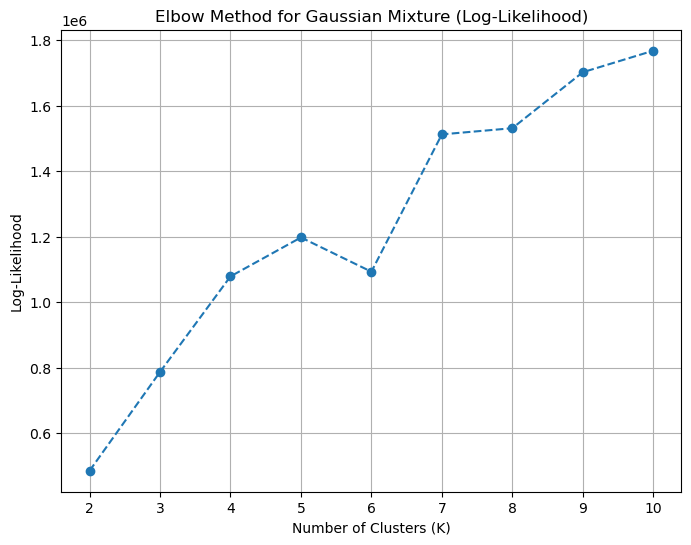

In [90]:
log_likelihoods = []  # For Elbow Method
sil_scores = []       # For Silhouette Score

# Range of the number of clusters to evaluate
cluster_range = range(2, 11)

# Evaluation for each number of clusters
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(scaled_features)
    
    # Log-Likelihood (as a substitute for inertia)
    log_likelihoods.append(gmm.score(scaled_features) * len(scaled_features))
    
    # cluster prediction
    cluster_labels = gmm.predict(scaled_features)
    
    # Silhouette Score
    sil_score = silhouette_score(scaled_features, cluster_labels)
    sil_scores.append(sil_score)

# Plot Elbow Method (Log-Likelihood)
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, log_likelihoods, marker='o', linestyle='--')
plt.title('Elbow Method for Gaussian Mixture (Log-Likelihood)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

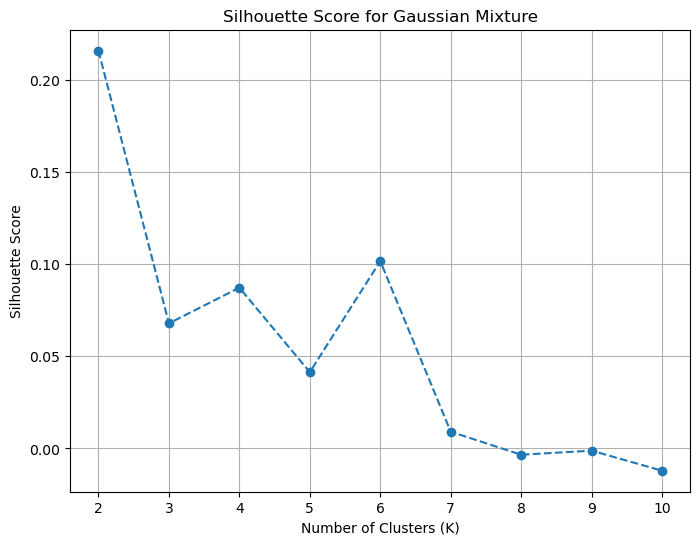

In [91]:
# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Gaussian Mixture')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [92]:
# Determine the number of clusters (e.g. 4 clusters)
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit GMM model on scaled data
gmm.fit(scaled_features)

gmm_df = data_without_outliers.copy()

# Predicted cluster label for each data
gmm_df['cluster'] = gmm.predict(scaled_features)

gmm_df.head()

,cust_id,recency_days,frequency,monetary,average_discount_percent,total_discount_used,average_order_value,average_qty_ordered,diversity_of_categories,region_purchase_concentration,customer_lifetime_value,product_diversity_index,customer_loyalty_index,days_since_sign_in,Outlier_Label,Anomaly_Score,cluster
0,15,231,6,216.80,0.000000,0.0,36.133333,2.166667,3,1.0,216.80,1.0,1300.80,3926,1,0.083325,0
1,21,239,1,105.00,0.000000,0.0,105.000000,6.000000,1,1.0,105.00,1.0,105.00,4145,1,0.083540,3
2,23,54,6,871.14,0.000000,0.0,145.190000,2.333333,2,1.0,871.14,1.0,5226.84,3223,1,0.083242,0
3,28,132,11,3971.30,6.266262,500.0,361.027273,2.363636,3,1.0,3471.30,1.0,43684.30,5314,1,0.033801,2
4,41,316,1,219.90,0.000000,0.0,219.900000,2.000000,1,1.0,219.90,1.0,219.90,3541,1,0.108311,3


In [93]:
# Calculating the amount of data per cluster
cluster_counts = gmm_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Display the amount of data per cluster
print("Amount of Data per Cluster:")
print(cluster_counts)

Amount of Data per Cluster:
   cluster  count
0        3  25423
1        0  12152
2        2  11091
3        1   9157


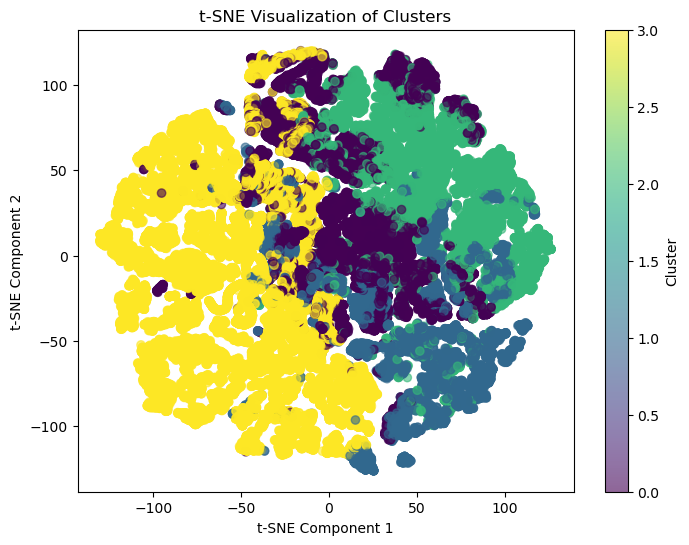

In [94]:
# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_features)

labels = gmm.fit_predict(scaled_features)

# Visualization of t-SNE results with colors based on cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [95]:
# Evaluating clustering  
# 1. Silhouette Score  
silhouette_avg = silhouette_score(scaled_features, gmm_df['cluster'])  
print(f'Silhouette Score: {silhouette_avg:.2f}')  

# 2. Davies-Bouldin Index  
db_index = davies_bouldin_score(scaled_features, gmm_df['cluster'])  
print(f'Davies-Bouldin Index: {db_index:.2f}')  

# 3. Calinski-Harabasz Score  
ch_score = calinski_harabasz_score(scaled_features, gmm_df['cluster'])
print(f'Calinski-Harabasz Score: {ch_score:.2f}')      

Silhouette Score: 0.09
Davies-Bouldin Index: 2.39
Calinski-Harabasz Score: 6342.56


In [61]:
# Save output
clusters_dataframes = {}  

# SSave DataFrame for each cluster  
for cluster_num in range(n_clusters): 
    clusters_dataframes[cluster_num] = gmm_df[gmm_df['cluster'] == cluster_num]  

for cluster_num, cluster_df in clusters_dataframes.items():  
    # Set the filename of each cluster  
    cluster_df.to_excel(f'Output/GMM/Cluster_{cluster_num}.xlsx', index=False)

# Mean Shift

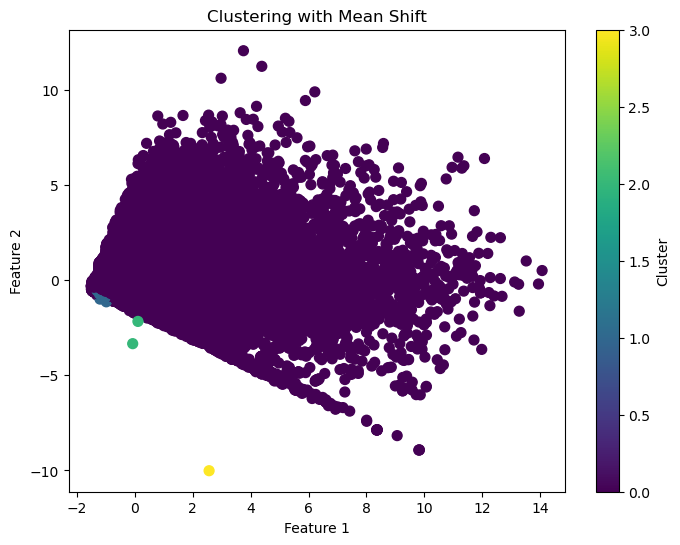

Number of clusters found: 4
Amount of noise (-1): 0


In [96]:
from sklearn.cluster import MeanShift


# Apply Mean Shift to the scaled dataset (scaled_features)
mean_shift = MeanShift(bandwidth=4.5)  # bandwidth is the main parameter that controls the size of the density search radius
mean_shift.fit(features_reduce)

# Retrieve the clustering result label
labels = mean_shift.labels_

# Visualization of clustering results
plt.figure(figsize=(8, 6))
plt.scatter(features_reduce[:, 0], features_reduce[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clustering with Mean Shift")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Display additional information
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)}")
print(f"Amount of noise (-1): {list(labels).count(-1)}")


In [97]:
score = silhouette_score(features_reduce, labels)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5731412817661147


In [98]:
mean_shift_df = data_without_outliers.copy()

# Perform cluster fitting and add the cluster results to the DataFrame
mean_shift_df['cluster'] = mean_shift.fit_predict(features_reduce)

# Display some clustering results
mean_shift_df[['cluster']].head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [99]:
# Calculating the amount of data per cluster
cluster_counts = mean_shift_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'count']

# Display the amount of data per cluster
print("Number of Data per Cluster:")
print(cluster_counts)

Number of Data per Cluster:
   cluster  count
0        0  57803
1        1     17
2        2      2
3        3      1


In [66]:
# Save output
clusters_dataframes = {}  

# Save DataFrame for each cluster  
for cluster_num in range(n_clusters):   
    clusters_dataframes[cluster_num] = mean_shift_df[mean_shift_df['cluster'] == cluster_num]  

for cluster_num, cluster_df in clusters_dataframes.items():  
    # Set the filename of each cluster  
    cluster_df.to_excel(f'Output/Meanshift/Cluster_{cluster_num}.xlsx', index=False)